In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import branca.colormap as cm
from sklearn.preprocessing import MinMaxScaler

In [192]:
df_ingr = pd.read_csv("./17_20_ingresos_familias.csv")
df_cords = pd.read_csv("./comunas_cords.csv")

In [193]:
df_ingr.columns = ['Unnamed: 0', 'Comuna', 'id_comuna', 'annio', '0-500000',
       '500001-1000000', '1000001-1500000', '1500001-2000000',
       '2000001-2500000', '2500001-3000000', '3000001-3500000',
       '3500001-4000000', '4000001-4500000', '4500001-5000000',
       'Mayor o igual a 5000001']
df_cords.columns = ['Unnamed: 0', 'id_comuna', 'Latitud', 'Longitud']

In [194]:
df_ingr = df_ingr.merge(df_cords[['id_comuna', 'Latitud', 'Longitud']], on='id_comuna', how='left')

In [195]:
df_ingr_17 = df_ingr.loc[df_ingr["annio"] == 2017]

In [196]:
def conv_lat(char):
    char = char.replace(".","")
    return float(char[:1] +"."+char[1:])

def conv_lat1(char):
    char = char.replace(".","")
    return float(char[:3] +"."+char[3:])

df_ingr_17["Latitud"] = df_ingr_17["Latitud"].apply(conv_lat)
df_ingr_17["Longitud"] = df_ingr_17["Longitud"].apply(conv_lat1)

C:\Users\Sayan\AppData\Local\Temp\ipykernel_19632\2987667479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingr_17["Latitud"] = df_ingr_17["Latitud"].apply(conv_lat)
C:\Users\Sayan\AppData\Local\Temp\ipykernel_19632\2987667479.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingr_17["Longitud"] = df_ingr_17["Longitud"].apply(conv_lat1)


In [197]:
df_ingr_17 = df_ingr_17.reset_index()
df_ingr_17 = df_ingr_17.drop("Unnamed: 0", axis= 1)
df_ingr_17 = df_ingr_17.drop("index", axis= 1)

In [198]:
from folium.plugins import HeatMapWithTime, HeatMap

mapa = folium.Map(location=[6.2442, -75.5812], zoom_start=12)

puntos = df_ingr_17[['Latitud', 'Longitud', "0-500000"]].values.tolist()
valores = df_ingr_17["0-500000"].tolist()
HeatMap(puntos, radius=35, ).add_to(mapa)
#HeatMapWithTime(puntos, radius=35).add_to(mapa)
mapa

In [199]:
colums = ['0-500000', '500001-1000000',
       '1000001-1500000', '1500001-2000000', '2000001-2500000',
       '2500001-3000000', '3000001-3500000', '3500001-4000000',
       '4000001-4500000', '4500001-5000000', 'Mayor o igual a 5000001']
promd = [250000, 750000, 1250000, 1750000, 2250000, 2750000, 3250000, 3750000, 4250000, 4750000, 5250000]
def aplicar_promd(row):
    mult = row[colums] * promd 
    mult_sum = mult.sum()
    total = row[colums].sum()
    return mult_sum / total

df_ingr_17["Promedio ganancias"] = df_ingr_17.apply(aplicar_promd, axis=1)

In [201]:
mapa = folium.Map(location=[6.2442, -75.5812], zoom_start=12)
mapa
puntos = df_ingr_17[['Latitud', 'Longitud', "Promedio ganancias"]].values.tolist()
HeatMap(puntos, radius=35).add_to(mapa)
mapa

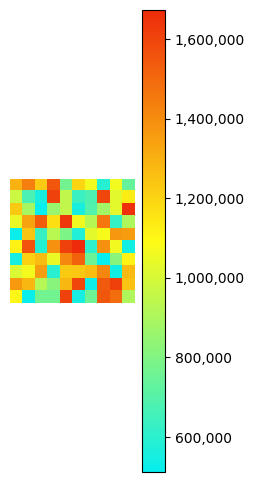

In [209]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

data = np.random.randint(500000, 1700000, (10, 10))

fig, ax = plt.subplots(figsize=(2, 6))  # Ajusta el tamaño según tus preferencias

colors = ['#06EEEF', '#FFFB15', '#EE2B0A']
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=256)

cax = ax.matshow(data, cmap=cmap)

ax.axis('off')

cbar = fig.colorbar(cax)

cbar.formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
cbar.update_ticks()

plt.show()
